# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
file_path='/content/drive/My Drive/Colab Notebooks/foodhub_order.csv'
df = pd.read_csv(file_path)
#df = pd.read_csv('foodhub_order.csv')
df = pd.DataFrame(df)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
rows_count=len(df)
columns_count=df.shape[1]
print("rows_count", rows_count)
print("columns_count", columns_count)

rows_count 1898
columns_count 9


#### Observations: For this dataset, there are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 3 different data types: int64, object & float64.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
mean_ratings = df.groupby('restaurant_name')['rating'].mean()
df['rating'] = df.apply(
    lambda row: mean_ratings[row['restaurant_name']] if pd.isna(row['rating']) else row['rating'],
    axis=1
)

path = '/content/drive/My Drive/Colab Notebooks/restaurant_ratings.xlsx'

# Save the DataFrame to an Excel file at the specified path
df.to_excel(path, index=False)


In [7]:
nan_count = df['rating'].isnull().sum()
print(nan_count)

30


In [8]:
df2 = df[df['rating'].notna()]
df2.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.000000,20,24


#### Observations: In the 'rating' column, a significant amount of data is missing. For restaurants that had ratings, the average rating was used to fill in the missing data. However, 30 restaurants did not have any ratings and were thus excluded. A second data frame was created to include only records that had ratings.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df2.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.868000e+03,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,1.477495e+06,170801.970021,16.512195,4.349154,27.361349,24.185225
std,5.489092e+02,113536.338875,7.473723,0.610783,4.628866,4.960147
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477020e+06,77544.000000,12.080000,4.000000,23.000000,20.000000
50%,1.477492e+06,128476.500000,14.160000,4.328125,27.000000,25.000000
75%,1.477973e+06,270444.000000,22.272500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

"For the 'food_preparation_time' variable, we have computed some basic statistics. The average preparation time is approximately 27.36 minutes. The shortest recorded preparation time is 20 minutes, while the longest is 35 minutes."


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
# read the data
file_path='/content/drive/My Drive/Colab Notebooks/foodhub_order.csv'
df = pd.read_csv(file_path)
#df = pd.read_csv('foodhub_order.csv')
df = pd.DataFrame(df)
Not_Given_count = df[df['rating']=='Not given']['order_id'].count()
print(Not_Given_count)


736


#### Observations: In the original dataset, 736 orders lacked ratings. After assigning the average score to the missing ratings for restaurants, only 30 records remained unrated. These records were then excluded from the new dataset: df2. For questions with ratings, df2 will be used; otherwise, df will be used.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
# Write the code here

columns_to_check = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type','day_of_the_week']
unique_counts = df2[columns_to_check].nunique()
print(unique_counts)

order_id           1868
customer_id        1183
restaurant_name     156
cuisine_type         14
day_of_the_week       2
dtype: int64


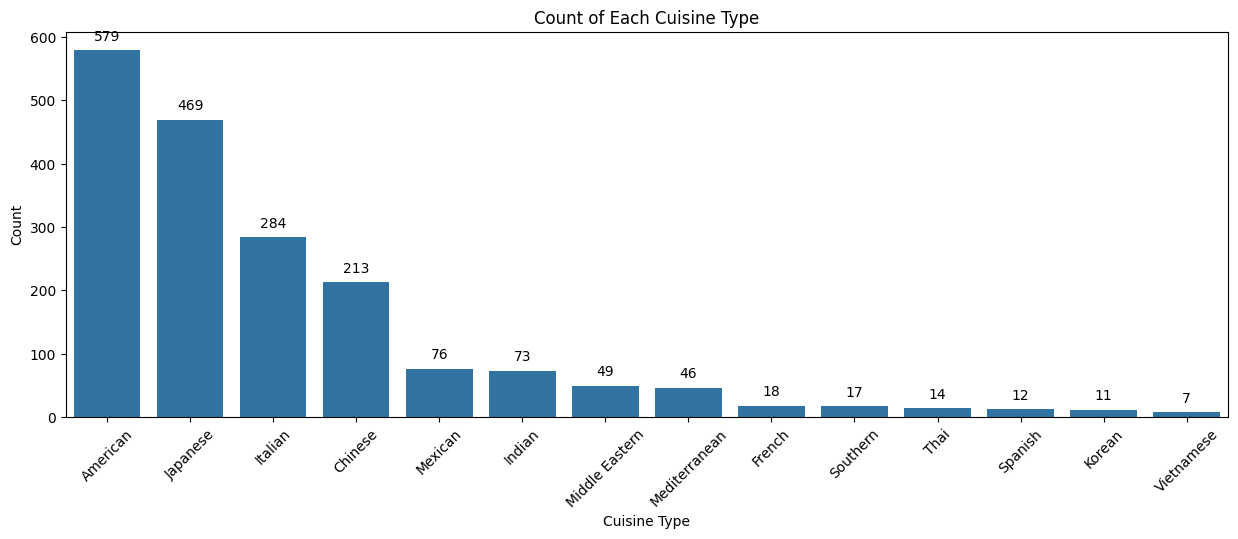

In [12]:
#Countplot the resturant type

# Calculate the count of each category and sort it
category_counts = df2['cuisine_type'].value_counts().sort_values(ascending=False)
sorted_categories = category_counts.index  # This will be used to order the bars

# Create the plot
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df2, x='cuisine_type', order=sorted_categories)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # This formats the count as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # This positions the text
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(0, 10),  # Distance from the bar
                textcoords='offset points')

plt.title('Count of Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

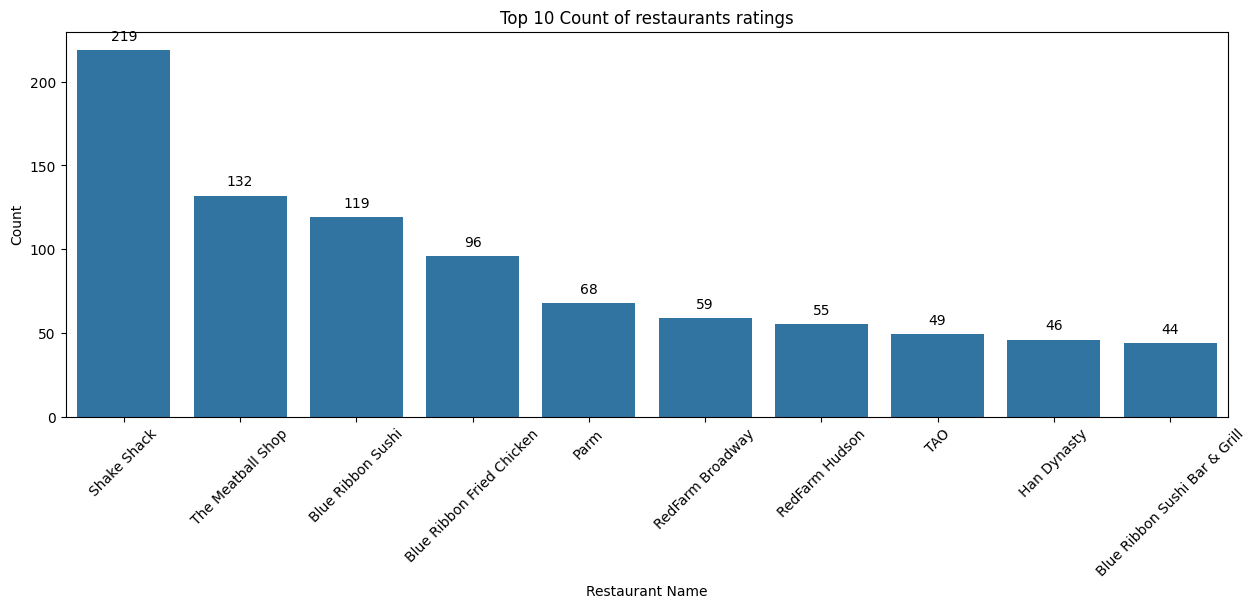

In [14]:
#Countplot the Restaurant name type

# Calculate the count of each category and sort it
restaurant_counts = df2['restaurant_name'].value_counts().sort_values(ascending=False)[:10]
sorted_restaurants = restaurant_counts.index  # This will be used to order the bars

# Create the plot
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df2, x='restaurant_name', order=sorted_restaurants)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # This formats the count as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # This positions the text
                ha='center', va='center',  # Horizontal and vertical alignment
                xytext=(0, 10),  # Distance from the bar
                textcoords='offset points')

plt.title('Top 10 Count of restaurants ratings')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

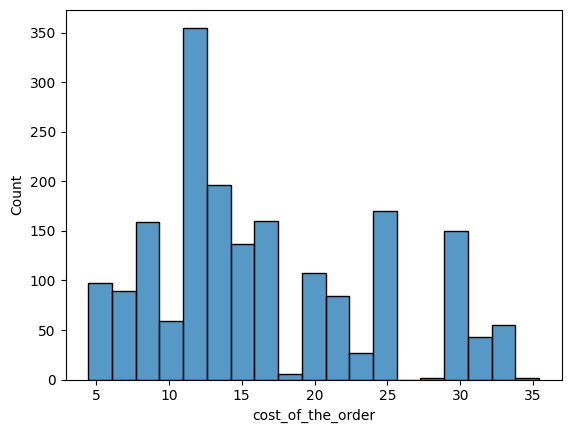

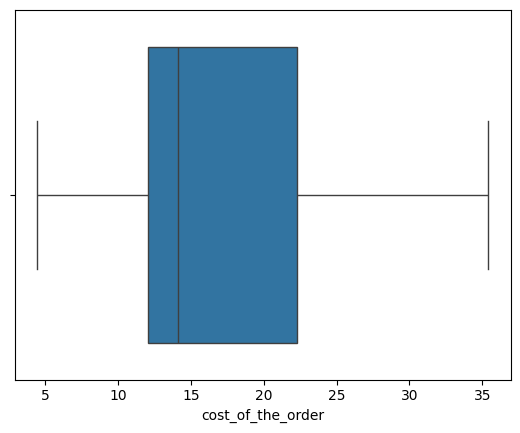

In [15]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

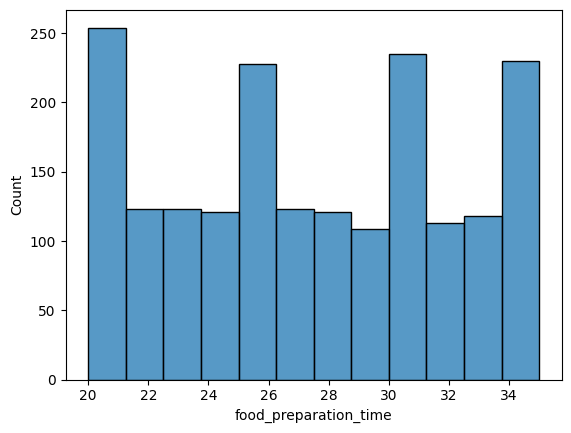

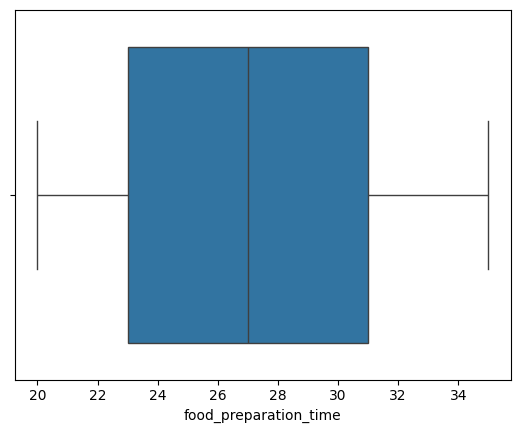

In [16]:
sns.histplot(data=df,x='food_preparation_time') ## Histogram for the food_preparation_time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Boxplot for the food_preparation_time
plt.show()

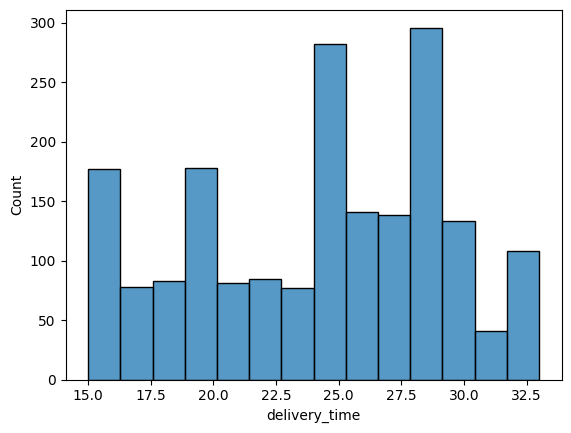

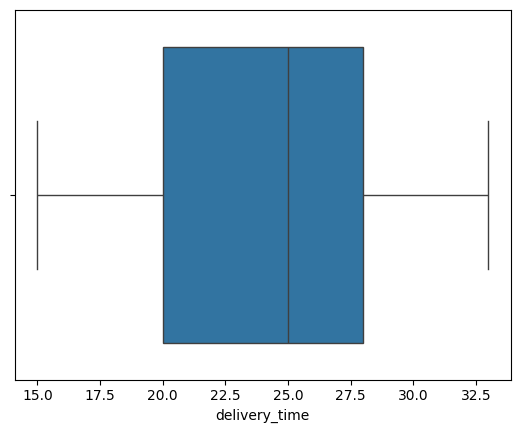

In [17]:
sns.histplot(data=df,x='delivery_time') ## Histogram for the delivery_time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Boxplot for the delivery_time
plt.show()

#### Observations: 1183 customers reviewed 156 restaurants, which offer 14 different types of cuisines. The top three cuisines based on ratings are American, Japanese, and Italian. Meanwhile, the highest-rated restaurants include Shake Shack, The Meatball Shop, and Blue Ribbon Sushi. Regarding the interquartile range (IQR), the cost of an order falls between 12 and 22 dollars; food preparation time ranges from 23 to 31 minutes, and delivery time spans from 20 to 28 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
# Write the code here
restaurant_counts = df['restaurant_name'].value_counts().sort_values(ascending=False)[:5]
print(restaurant_counts)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: Top 5 restaurants in terms of the number of orders received are: Shake Shack(219 orders), The Meatball Shop(132 orders), Blue Ribbon Sushi(119 orders), Blue Ribbon Fried Chicken(96 orders) and Parm(68 orders).


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
# Write the code here
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
Cuisine_counts = weekend_orders['cuisine_type'].value_counts().sort_values(ascending=False)
print(Cuisine_counts)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations: The most popular cuisins on weekends are: American (415 orders). The other two following popular ones are: Japanese(335 orders), and Italian(207 orders)



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
# Write the code here
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100
print(f"Percentage of orders over $20: {percentage_above_20:.2f}%")

Percentage of orders over $20: 29.24%


#### Observations:
29.24% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
print(mean_delivery_time)

24.161749209694417


#### Observations: the average deivery time for all orders are 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# Write the code here
Top_3_customer_id=df['customer_id'].value_counts().head(3)
print(Top_3_customer_id)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:Top 3 customer IDs are: 52832 (13 orders), 47440 (10 orders)and 83287 (9 orders)



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


1. Cost and cruisin type

<ipython-input-24-ea26cf0f7d4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


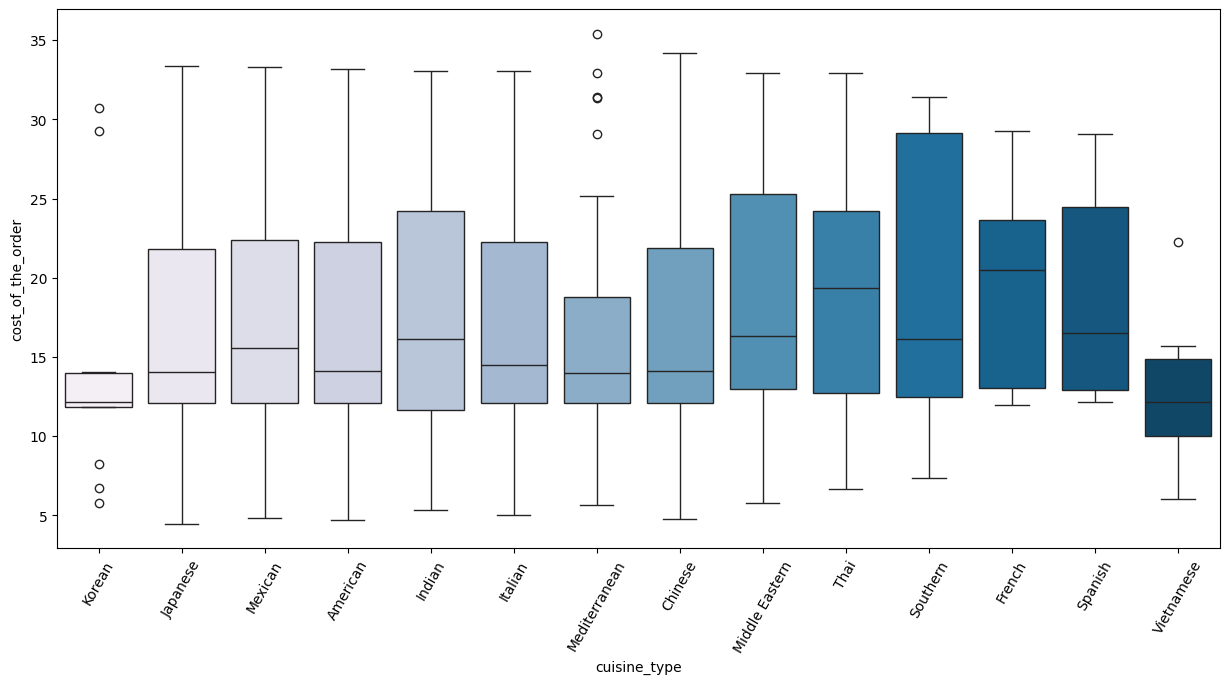

In [24]:
# Write the code here
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()




2. Cuisine vs Food Preparation time

<ipython-input-25-2b24b1433b40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


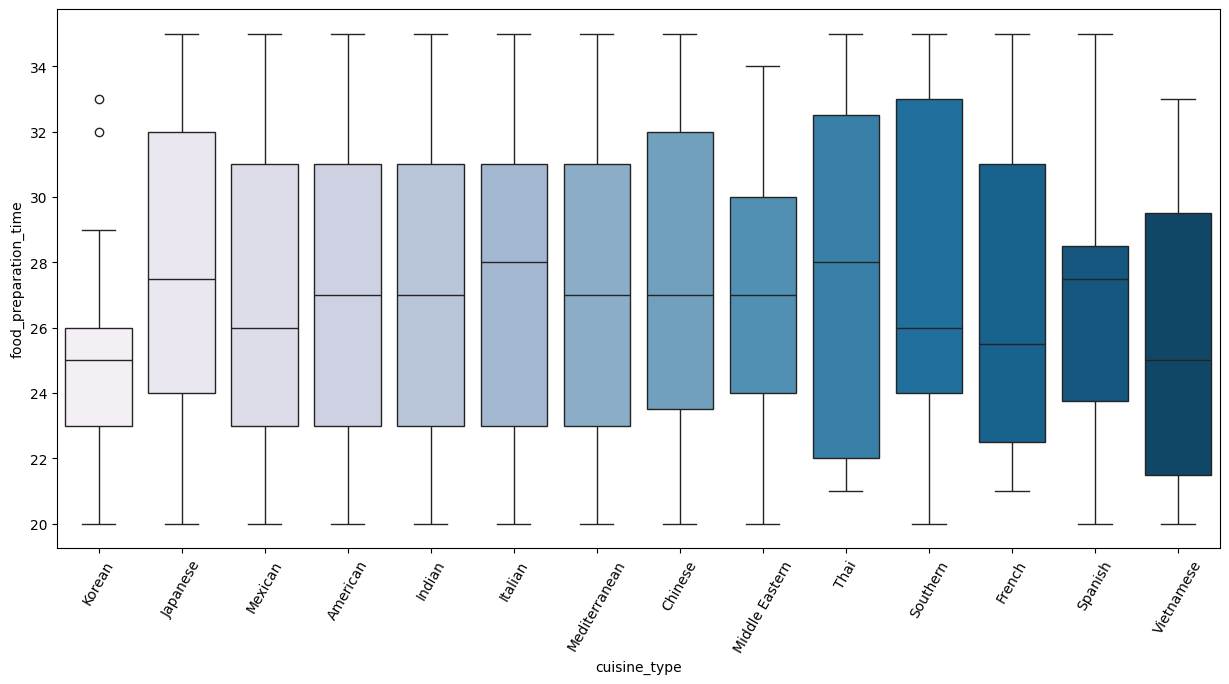

In [25]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

3. Day of the Week vs Delivery time

<ipython-input-26-268ee2d84486>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


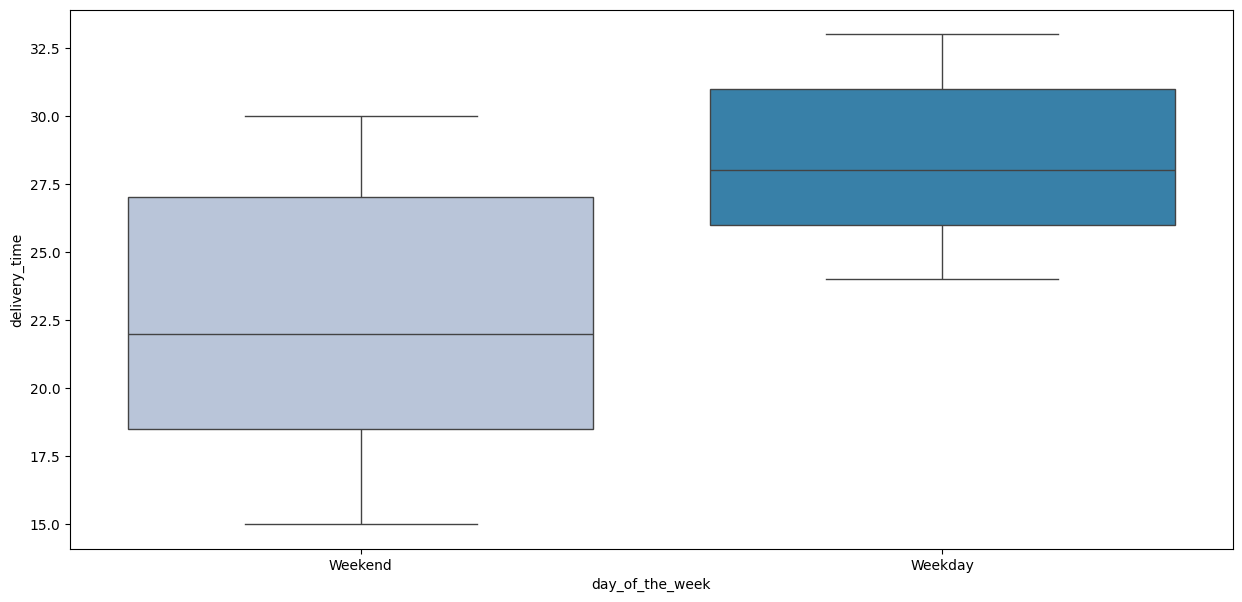

In [26]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

4. the revenue generated by the restaurants

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

5. Rating vs Delivery time

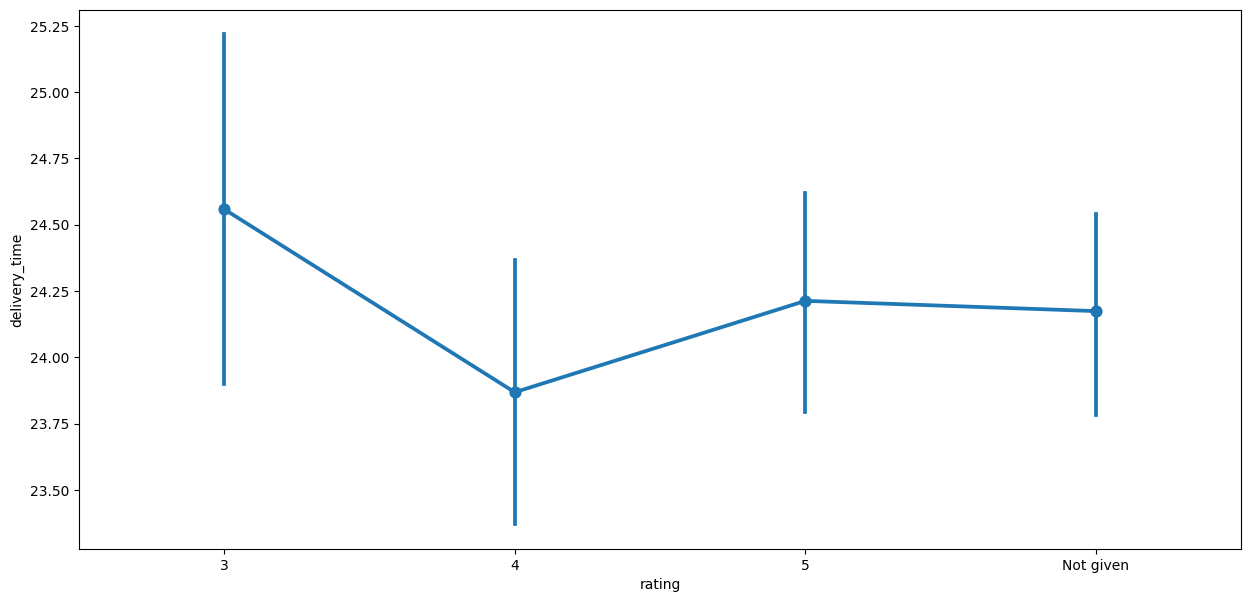

In [30]:
# Relationship between rating and delivery time
df_sorted = df.sort_values('rating')
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df_sorted)
plt.show()

Rating vs Food preparation time

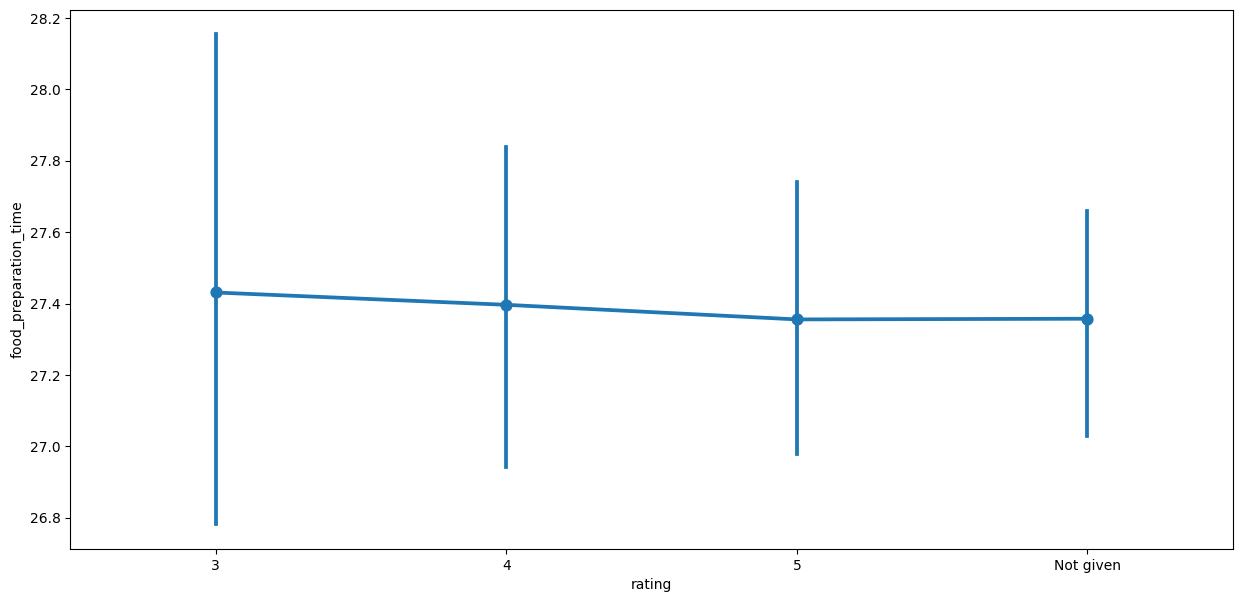

In [28]:
# Relationship between rating and delivery time
df_sorted = df.sort_values('rating')
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df_sorted)
plt.show()

Rating vs Cost of the order

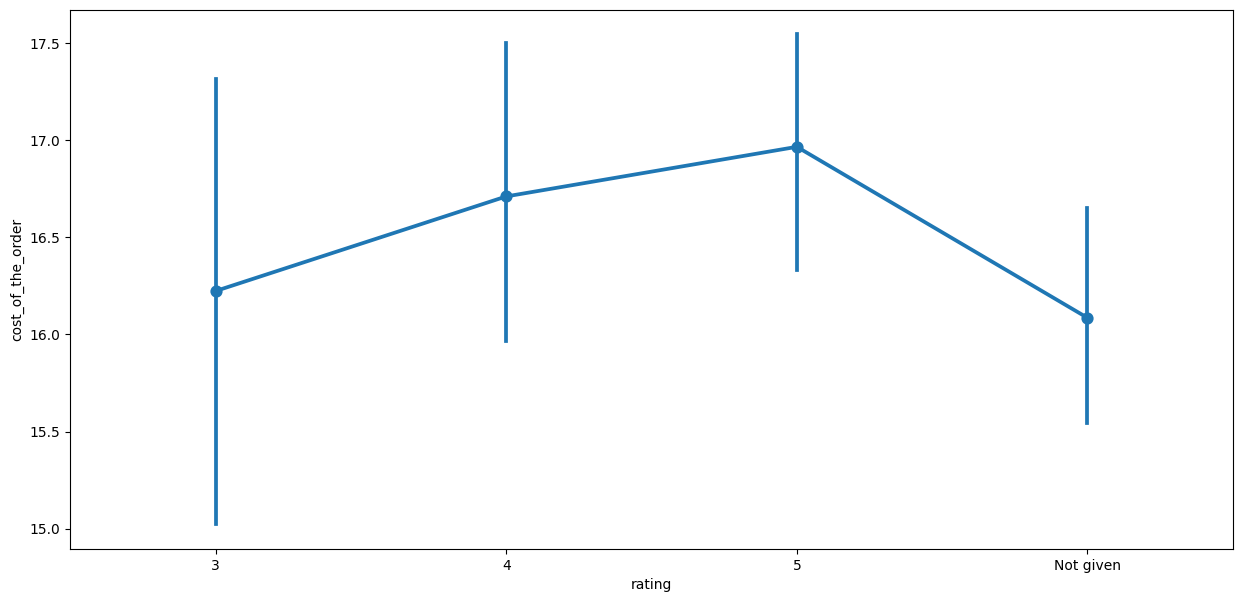

In [31]:
# Relationship between rating and delivery time
df_sorted = df.sort_values('rating')
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df_sorted)
plt.show()

Correlation among variables

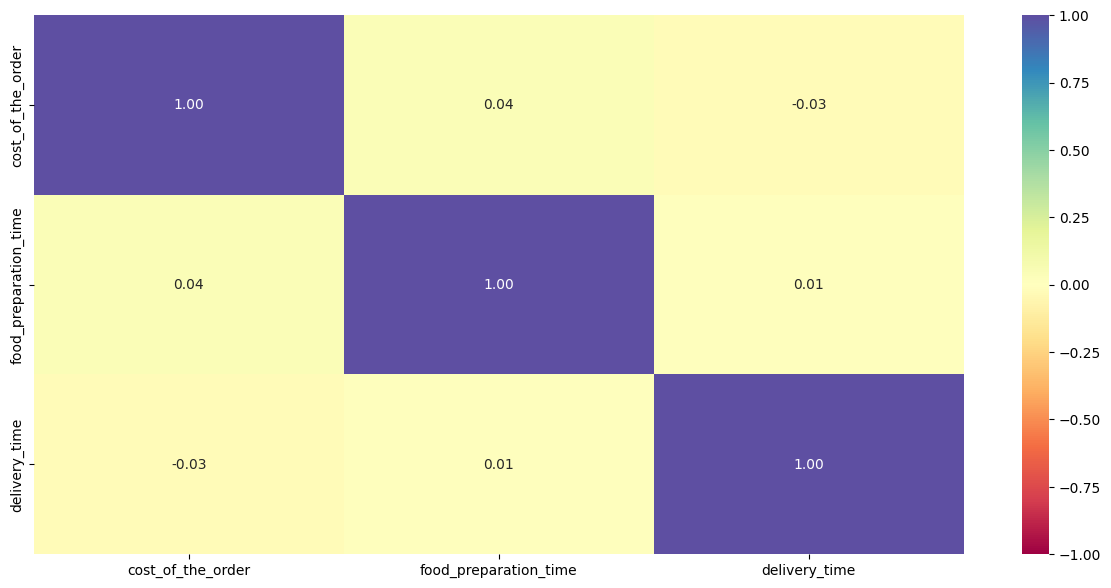

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

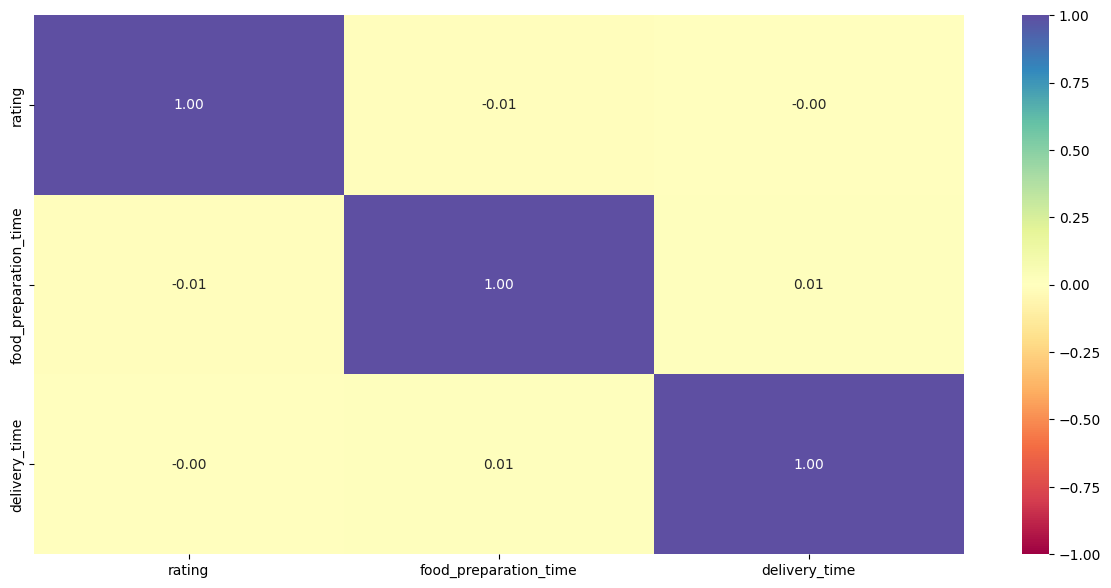

In [33]:
# Plot the heatmap
col_list = ['rating', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df2[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations: n this particular dataset, as indicated by the heatmap, there is a negative correlation between rating and delivery time. Although the volume of orders and revenue during weekends significantly exceeds that of weekdays, delivery times are notably quicker on weekends compared to weekdays.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
df_rating_count = df2.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
#print(df_rating_count)
df_rating_mean = df2.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
#print(df_rating_mean)

# Filter for restaurants with more than 100 ratings
filtered_count = df_rating_count[df_rating_count['rating'] > 50]

# Filter for restaurants with an average rating above 4
filtered_mean = df_rating_mean[df_rating_mean['rating'] > 4]

# Find common restaurants that appear in both filtered data frames
common_restaurants = pd.merge(filtered_count, filtered_mean, on='restaurant_name')

# Print the result
print(common_restaurants)

             restaurant_name  rating_x  rating_y
0                Shake Shack       219  4.278195
1          The Meatball Shop       132  4.511905
2          Blue Ribbon Sushi       119  4.219178
3  Blue Ribbon Fried Chicken        96  4.328125
4                       Parm        68  4.128205
5           RedFarm Broadway        59  4.243902
6             RedFarm Hudson        55  4.176471


#### Observations: Shake Shack has 219 ratings with an average score of 4.28, meeting both criteria.
The Meatball Shop has 132 ratings with an average score of 4.51, meeting both criteria.
Blue Ribbon Sushi has 119 ratings with an average score of 4.22, meeting both criteria.
Blue Ribbon Fried Chicken has 96 ratings with an average score of 4.33, meeting both criteria.
Parm has 68 ratings with an average score of 4.13, meeting both criteria.
RedFarm Broadway has 59 ratings with an average score of 4.24, meeting both criteria.
RedFarm Hudson has 55 ratings with an average score of 4.18, meeting both criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations: The net revenue generated is calculated and added to the dataset

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [34]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
more_than_60=df[df['total_time']>60]
count_more_than_60 = more_than_60.shape[0]
total_count=df.shape[0]
percentage_over_60_mins = (count_more_than_60 / total_count) * 100
print(count_more_than_60)
print(percentage_over_60_mins)
print(f"Percentage of orders more than 60min: {percentage_over_60_mins:.2f}%")

200
10.537407797681771
Percentage of orders more than 60min: 10.54%


#### Observations: 10.54% of orders had total order time (prep & delivery) over 60 minutes.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Get the mean delivery time on weekend and print it
print('The mean delivery time on weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


#### Observations: On weekends, the average delivery time is 22 minutes, compared to 28 minutes on weekdays, which is noticeably shorter


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Overview of Order Volume and Restaurant Popularity:
The dataset identifies Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm as the top five restaurants in terms of order volume, with Shake Shack leading significantly with 219 orders.
American cuisine dominates weekend orders with 415 transactions, followed by Japanese and Italian cuisines with 335 and 207 orders respectively.

Financial Insights and Order Pricing:
Approximately 29.24% of all orders exceed the $20 price point, indicating a substantial portion of higher-value transactions within this dataset.

Delivery Metrics:
The overall average delivery time for orders is approximately 24.16 minutes.
A comparative analysis of weekend vs. weekday delivery times reveals that weekend deliveries are more efficient, averaging 22 minutes compared to 28 minutes on weekdays.

Customer Loyalty and Engagement:
Top customers identified by their IDs—52832, 47440, and 83287—show repeated engagement, with the highest placing 13 orders.

Quality of Service and Correlation Analysis:
There is a noted negative correlation between customer ratings and delivery times. This could suggest that faster delivery times might contribute to higher customer satisfaction.
Restaurants with a significant number of reviews (over 50) generally maintain high ratings, all above 4.0, indicating consistent customer satisfaction.

Operational Challenges:
Despite the overall efficient delivery times, 10.54% of orders experience a total order time (including preparation and delivery) of over 60 minutes, highlighting potential areas for operational improvement, especially during peak hours or in specific service areas.

Conclusion:
The analysis of this dataset underscores the critical interplay between service speed, customer satisfaction, and cuisine popularity. The efficiency of weekend deliveries presents a key operational strength, particularly as it aligns with high order volumes. Maintaining high customer ratings across popular restaurants showcases a strong commitment to quality, which is crucial for sustained customer loyalty. However, the challenge of lengthy total order times for a noticeable fraction of orders suggests that there may be opportunities to streamline operations further. Continual monitoring of delivery times, coupled with strategies to enhance customer experiences during peak periods, will be vital in driving overall service excellence and business growth.








### Recommendations:
Based on the insights derived from the data analysis, here are some targeted recommendations for the food delivery app company to enhance service efficiency, customer satisfaction, and overall business growth:

Optimize Weekend Operations:
Given that weekends show both a higher volume of orders and faster delivery times, it's crucial to ensure that staffing and logistical support are optimized to handle the increased demand. This could involve scheduling more delivery personnel and collaborating with restaurants to ensure they can handle peak times without delays.

Focus on High-Value Orders:
With nearly 30% of orders exceeding $20, consider introducing loyalty programs or promotions targeted at these higher-value customers to increase retention and boost average order values further. Special offers or membership perks could incentivize repeat business.

Improve Delivery Times During Weekdays:
Analyze the factors contributing to longer delivery times on weekdays. Solutions might include route optimization for delivery drivers or staggered pickup times to avoid congestion. Technological enhancements, such as real-time traffic updates and more efficient route mapping, could also reduce delivery times.

Address Long Total Order Times:
For the 10.54% of orders taking over 60 minutes, investigate the specific causes—whether they relate to certain cuisines, restaurants, or times of day. Implement targeted interventions such as better forecasting for prep times, more accurate customer communication, or even penalty clauses for restaurants that consistently delay.

Enhance Customer Engagement Through Ratings:
Leverage the positive correlation between quick delivery and high ratings by introducing a feedback loop where customers can rate their delivery experience in real-time. This could help identify issues as they happen and before they impact the rating severely.

Expand Popular Cuisine Offerings:
Given the popularity of American, Japanese, and Italian cuisines, consider partnering with more restaurants in these categories. Additionally, exploring promotional campaigns around these cuisines could further boost order volumes.

Develop Strategic Partnerships:
Strengthen relationships with the top-performing restaurants to ensure they are equipped to handle high volumes without compromising on food quality or delivery times. Joint marketing efforts can also help both the app and the restaurants increase visibility and attract new customers.

Use Data Analytics for Continuous Improvement:
Implement a robust analytics framework to continuously monitor key performance indicators such as order volume, delivery times, customer satisfaction, and restaurant ratings. Use these insights to make data-driven decisions that align with strategic business goals.
By focusing on these areas, the food delivery app can improve operational efficiencies, enhance customer satisfaction, and drive sustained growth.


---